In [ ]:
%run -i '2WayComms_and_RC-V2_dummypolicy.py'

## test client

connecting to 192.168.0.103 port 65490
received b'start'
starting rl policy
red robot is being used. Please change the bot variable if this is incorrect
Connected to http://192.168.0.103:10000
['bias_ft', 'get_ft', 'system.listMethods', 'system.methodHelp', 'system.methodSignature']
port= /dev/ttyACM0
connecting to 192.168.0.103 port 65480


 u
 u
 u
 u
 u
 u
 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.001662125061452 y -18.012191941645742 z 2.2832208036579194
roll 179.3299651630372 pitch 2.0171647216200435 yaw -179.5883138270184
Forces and Torques:
[-0.1, -0.08, 0.5, -0.008799999999999999, 0.0005999999999999998, 0]


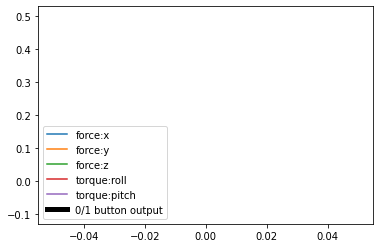

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.001792363627255 y -18.014183066385986 z 2.233523644260317
roll 179.33544615275832 pitch 2.0158806835916514 yaw -179.58971337485576
Forces and Torques:
[-0.12, -0.04000000000000001, 0.26, -0.0132, 0.0026000000000000003, 0]


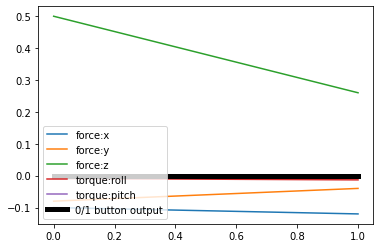

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.003006163594128 y -18.014436503595114 z 2.184203414045274
roll 179.33725278366933 pitch 2.0133993390052165 yaw -179.59057844171593
Forces and Torques:
[-0.42000000000000004, 1.7600000000000002, -1.3199999999999998, -0.33199999999999996, -0.06620000000000001, 0]


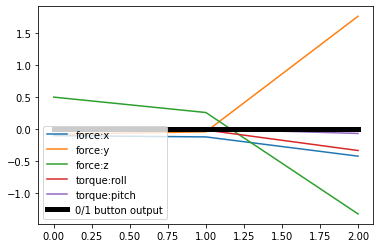

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.004617132520675 y -18.012367939707637 z 2.14641956345737
roll 179.3272580665265 pitch 2.0048736774665783 yaw -179.60298908330768
Forces and Torques:
[-0.7, 3.8, -1.1, -0.7436, -0.129, 0]


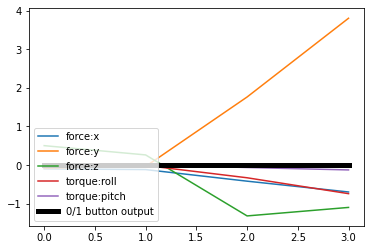

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.006272687622905 y -18.02064454189837 z 2.134457268520445
roll 179.36965404991952 pitch 1.9986113511748833 yaw -179.6051216197351
Forces and Torques:
[-0.9199999999999999, 4.959999999999999, -1.1600000000000001, -0.9428000000000001, -0.19180000000000003, 0]


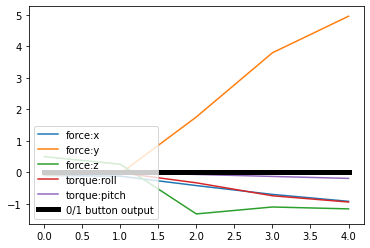

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.008557142466307 y -18.02949255113006 z 2.1209310841385274
roll 179.40572655312434 pitch 1.9889228712182028 yaw -179.6019108650736
Forces and Torques:
[-1.34, 6.720000000000001, 2.4400000000000004, -1.281398, -0.26159999999999994, 0]


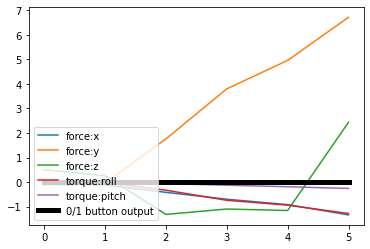

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.011996144595741 y -18.034513189175726 z 2.1047709420952945
roll 179.43807550417316 pitch 1.978641471235332 yaw -179.6042560167073
Forces and Torques:
[-0.82, 7.26, 2.32, -1.3688, -0.18120000000000003, 0]


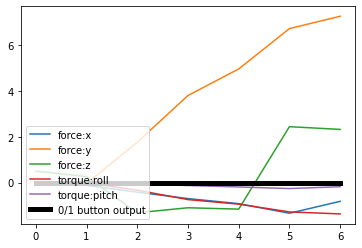

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.014824433450402 y -18.041325487491488 z 2.092708328263089
roll 179.46553486193395 pitch 1.9688137990573866 yaw -179.60346102750697
Forces and Torques:
[-0.6599999999999999, 7.4, 5.36, -1.4152, -0.14959799999999998, 0]


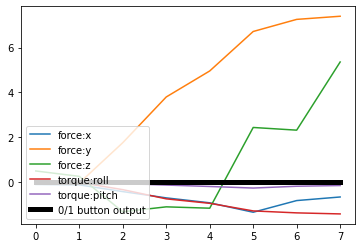

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.014845553217828 y -18.045718399116396 z 2.0531074443511663
roll 179.48684053657286 pitch 1.9646705807454539 yaw -179.59826479862826
Forces and Torques:
[-0.9800000000000001, 7.88, 3.5800000000000005, -1.4726, -0.211, 0]


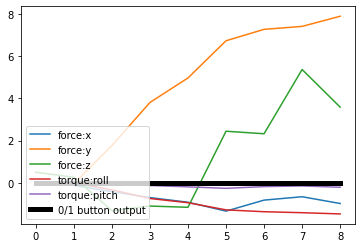

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.015781276246905 y -18.047328194722535 z 2.0435418030221015
roll 179.49862563335478 pitch 1.963393218960719 yaw -179.5989515801071
Forces and Torques:
[-1.2, 7.92, 4.92, -1.4940000000000002, -0.240798, 0]


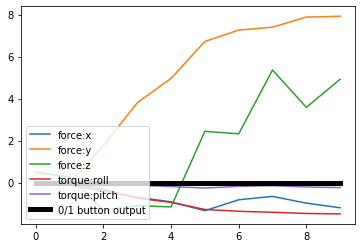

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.017195714004338 y -18.05506389620304 z 2.042231644116342
roll 179.52924720027528 pitch 1.9555800027426522 yaw -179.59902989398705
Forces and Torques:
[-1.4, 8.360000000000001, 3.22, -1.5872, -0.27080000000000004, 0]


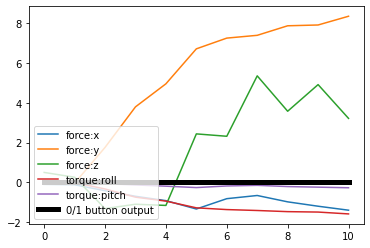

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.017850426794588 y -18.052915546527505 z 2.032663362816349
roll 179.52177655341845 pitch 1.9594280617962518 yaw -179.60397610035724
Forces and Torques:
[-1.3399999999999999, 8.16, 4.0, -1.5444, -0.2696, 0]


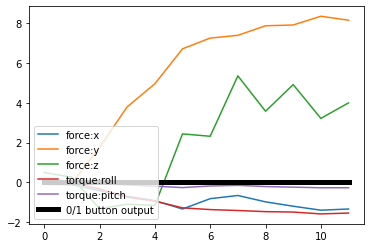

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.018516872788966 y -18.05761000149846 z 2.0308693559054287
roll 179.5369598211235 pitch 1.9545512277538708 yaw -179.59913467772137
Forces and Torques:
[-1.52, 8.64, 3.1, -1.6326, -0.306798, 0]


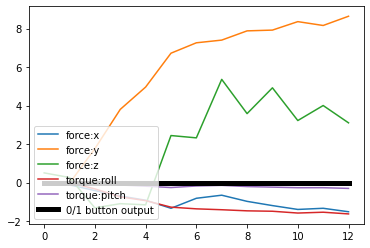

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.019008494041861 y -18.058759855502846 z 2.0236185290854425
roll 179.54027355556582 pitch 1.9537640456191194 yaw -179.60162437564088
Forces and Torques:
[-1.58, 8.639999999999999, 3.9799999999999995, -1.6312000000000002, -0.32059800000000005, 0]


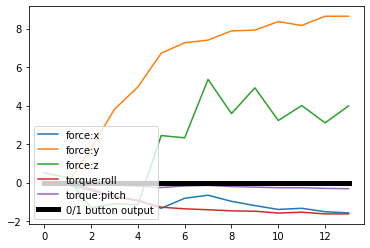

 j
 obs


BUTTON NOT PRESSED
currentpose: x -8.019117612840235 y -18.041835881870984 z 2.021531338736415
roll 179.53569749046346 pitch 1.9564156435365674 yaw -179.60101952270895
Forces and Torques:
[-1.6, 7.159999999999999, 3.3599999999999994, -1.3504, -0.30920000000000003, 0]


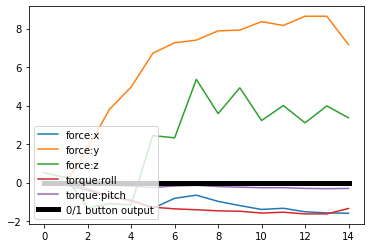

 j
 obs


BUTTON NOT PRESSED
currentpose: x -8.019058360159397 y -18.023624775746466 z 2.0206874280296265
roll 179.53274011057943 pitch 1.9601387917578719 yaw -179.6011040952572
Forces and Torques:
[-1.52, 5.58, 2.22, -1.0509979999999999, -0.28019999999999995, 0]


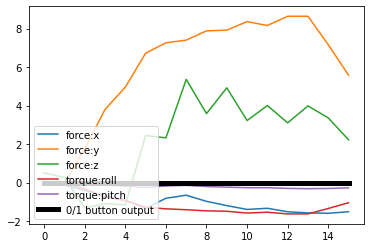

 j
 obs


BUTTON NOT PRESSED
currentpose: x -8.01843004707843 y -18.007692257863283 z 2.0207509339969607
roll 179.53346303023127 pitch 1.9615749738120243 yaw -179.5968825639171
Forces and Torques:
[-1.2, 4.26, 1.54, -0.833, -0.23879999999999998, 0]


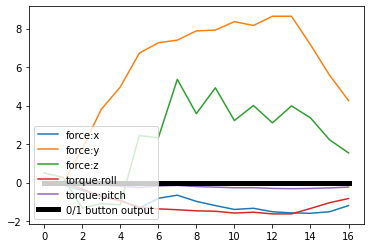

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.019090626470744 y -18.00703637175262 z 1.9686635742537677
roll 179.5275175065523 pitch 1.9623098381911934 yaw -179.59875747014894
Forces and Torques:
[-1.08, 4.4, 0.72, -0.8506, -0.2222, 0]


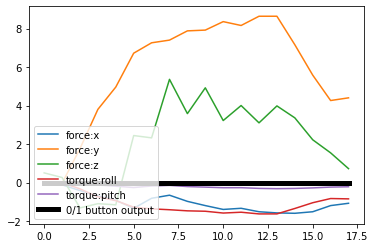

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.020046882607042 y -18.00532801723182 z 1.9166863599643111
roll 179.51985391539853 pitch 1.964199551503811 yaw -179.5999823241991
Forces and Torques:
[-1.02, 4.380000000000001, 3.0, -0.8533999999999999, -0.23120000000000002, 0]


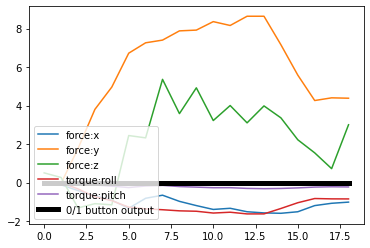

 l
 obs


BUTTON PRESSED! Episode over!
currentpose: x -8.022304351080955 y -18.003837900307776 z 1.867068399694562
roll 179.51954862432396 pitch 1.9650472427671462 yaw -179.60784325856557
Forces and Torques:
[-1.3199999999999998, 4.300000000000001, 0.16, -0.8343999999999999, -0.25, 0]


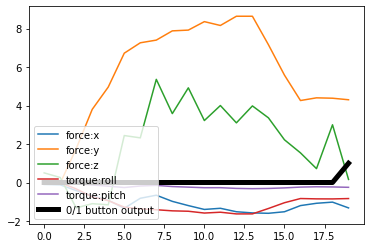

 reset


waiting for done response
b'done'


 u
 u
 j
 l
 k
 k
 k
 obs


BUTTON NOT PRESSED
currentpose: x -8.120060714580118 y -17.913624813741446 z 2.2814228367906066
roll 179.31157832664638 pitch 2.028107669063515 yaw -179.59467385934016
Forces and Torques:
[0.04, 0.0, 1.4600000000000002, -0.025, 0.0012000000000000001, 0]


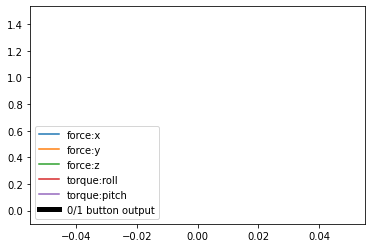

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.121004064191878 y -17.914416805019975 z 2.2316574781440197
roll 179.31554665039133 pitch 2.028636251237461 yaw -179.5961954834016
Forces and Torques:
[-0.08, 0.02, 0.96, -0.022399999999999996, 0.0066, 0]


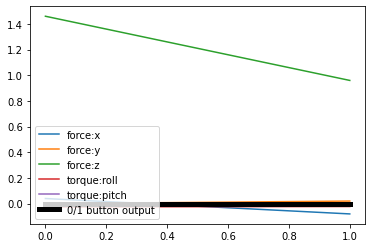

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.11967175886333 y -17.912633357992767 z 2.1803090169306847
roll 179.30737387006778 pitch 2.0291712049966653 yaw -179.59469072107075
Forces and Torques:
[-2.66, -0.45999999999999996, -1.1199999999999999, 0.022198, -0.47940000000000005, 0]


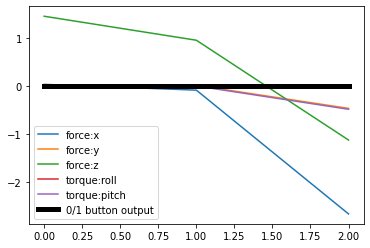

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.1185453712672 y -17.914928372719885 z 2.157197391437739
roll 179.30874148311045 pitch 2.0344911379638217 yaw -179.5949355993462
Forces and Torques:
[-5.12, -0.28, 0.78, -0.0258, -0.9110000000000001, 0]


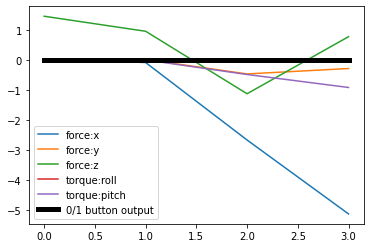

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.118484358605743 y -17.925616148358582 z 2.1268016461580994
roll 179.37083423144017 pitch 2.0268015490698774 yaw -179.58832008670444
Forces and Torques:
[-8.02, -0.02, -6.82, -0.08259999999999999, -1.3969999999999998, 0]


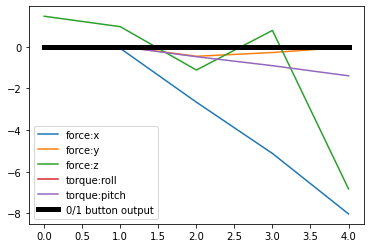

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.118728995911777 y -17.92703117277622 z 2.1203193442083896
roll 179.3795972296065 pitch 2.0240964438816738 yaw -179.58297960540517
Forces and Torques:
[-8.26, 0.04, -10.34, -0.1046, -1.4325999999999999, 0]


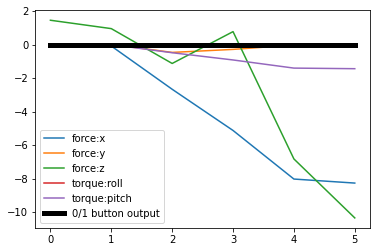

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.119266376660764 y -17.931749094155432 z 2.1175378415051846
roll 179.39153166268358 pitch 2.0205736081485455 yaw -179.57896174421535
Forces and Torques:
[-8.5, 0.43999999999999995, -13.48, -0.16899999999999998, -1.4412, 0]


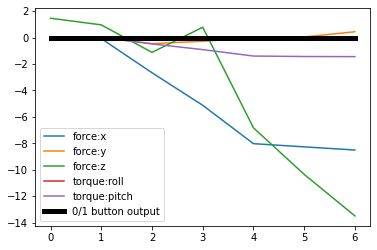

 h
 obs


BUTTON NOT PRESSED
currentpose: x -8.102160538364947 y -17.93200722464621 z 2.117885731007531
roll 179.3927577162533 pitch 2.0235736568992655 yaw -179.58099724899836
Forces and Torques:
[-6.0600000000000005, 0.52, -12.679999999999998, -0.15899800000000003, -1.028396, 0]


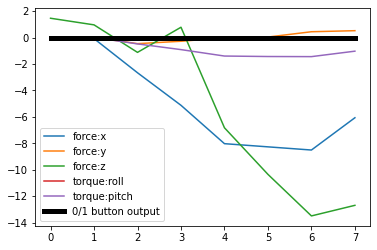

 h
 obs


BUTTON NOT PRESSED
currentpose: x -8.08454489234984 y -17.930080632528664 z 2.115931125865132
roll 179.38312099712806 pitch 2.02622379937535 yaw -179.58679829499147
Forces and Torques:
[-5.0, 0.43999999999999995, 3.3600000000000003, -0.154, -0.9190000000000002, 0]


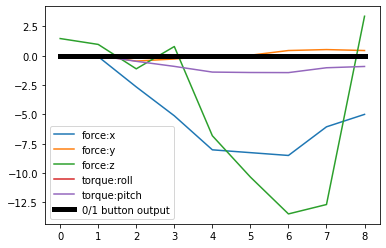

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.085365043318271 y -17.93733996592164 z 2.077547415216267
roll 179.42268595999445 pitch 2.019013520641463 yaw -179.5842920515584
Forces and Torques:
[-5.28, 0.96, 2.86, -0.2432, -0.9652, 0]


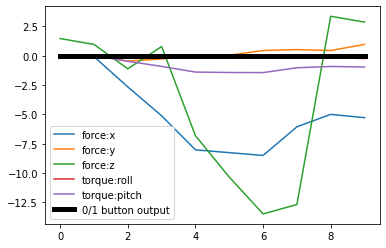

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.0851726187706 y -17.93582990255058 z 2.024088737240806
roll 179.41029806691193 pitch 2.0220447627968996 yaw -179.58296409564613
Forces and Torques:
[-5.380000000000001, 0.9800000000000001, 3.2800000000000002, -0.257, -0.9907999999999999, 0]


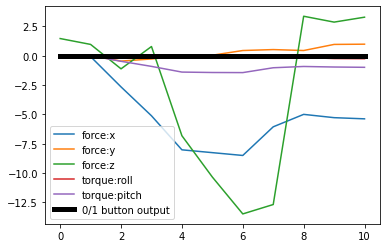

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.08461001163274 y -17.937030209332704 z 1.9733464426856488
roll 179.4090313328533 pitch 2.0245320053072215 yaw -179.5812630587996
Forces and Torques:
[-5.619999999999999, 0.7600000000000001, 3.4200000000000004, -0.2252, -1.0131979999999998, 0]


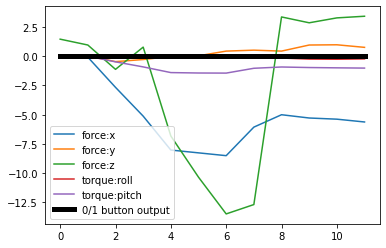

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.083789860664309 y -17.934577969670297 z 1.9226638408064842
roll 179.40079711609914 pitch 2.0272786067374464 yaw -179.5797965277889
Forces and Torques:
[-5.8, 0.72, 3.12, -0.2138, -1.0505980000000001, 0]


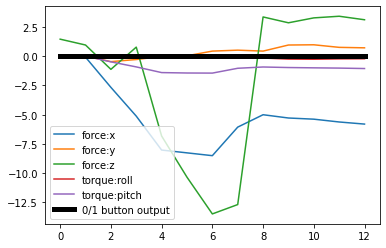

 l
 obs


BUTTON NOT PRESSED
currentpose: x -8.083907779365779 y -17.93260209809542 z 1.8704119228754192
roll 179.3914313788416 pitch 2.031680629987201 yaw -179.5845792540098
Forces and Torques:
[-6.08, 0.5599999999999999, 2.34, -0.20260000000000003, -1.0848, 0]


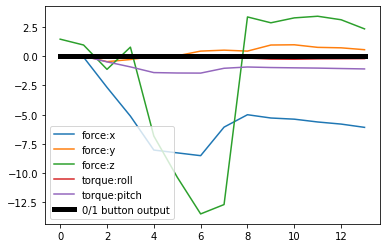

 l
 obs


BUTTON PRESSED! Episode over!
currentpose: x -8.08626556673497 y -17.942170526060462 z 1.8455486766714604
roll 179.4398301004176 pitch 2.0202563884302744 yaw -179.58331857209683
Forces and Torques:
[-6.76, 1.1199999999999999, -3.94, -0.314798, -1.2055980000000002, 0]


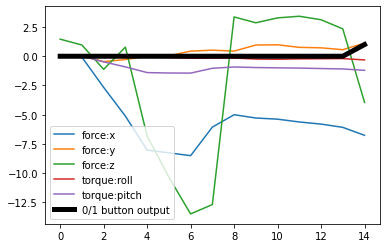

 reset


waiting for done response
b'done'


 h
 h
 h
 h
 h
 obs


BUTTON NOT PRESSED
currentpose: x -7.978227396459878 y -17.91507738441229 z 2.3263456087641416
roll 179.29096524508742 pitch 2.030459006153543 yaw -179.61050922321274
Forces and Torques:
[-0.04, -0.02, 1.9, -0.011197999999999998, 0.007200000000000001, 0]


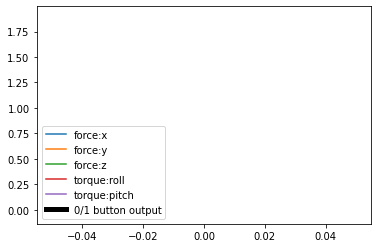

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.977337432926894 y -17.91384070469737 z 2.275764939095825
roll 179.28908398555197 pitch 2.0302503824417744 yaw -179.6067170384012
Forces and Torques:
[-0.1, -0.04, 1.72, -0.009600000000000001, 0.0056, 0]


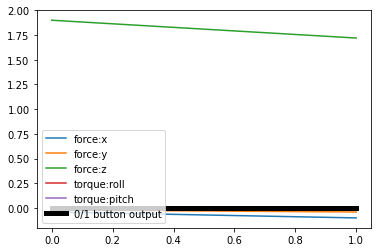

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.9777040955558425 y -17.91500581186712 z 2.2253658407613637
roll 179.29115912872655 pitch 2.03190531870284 yaw -179.6089767519352
Forces and Torques:
[-0.02, -0.02, 2.18, -0.013596, 0.006, 0]


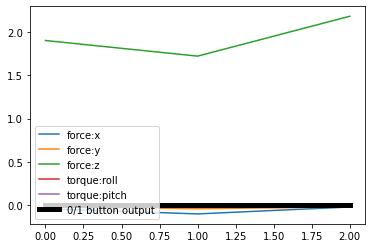

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.977912946589291 y -17.91475237465799 z 2.1766629237484185
roll 179.2924803363659 pitch 2.030257837904306 yaw -179.60712573230566
Forces and Torques:
[0.04, 0.0, 1.9600000000000002, -0.016396, 0.009395999999999998, 0]


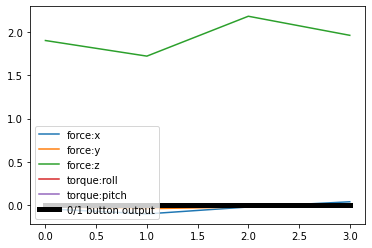

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.978452087318898 y -17.91675523260236 z 2.1283947219483554
roll 179.29859577541598 pitch 2.028204240219902 yaw -179.6057832038103
Forces and Torques:
[-0.1, 0.04000000000000001, 2.2, -0.014598, 0.014196, 0]


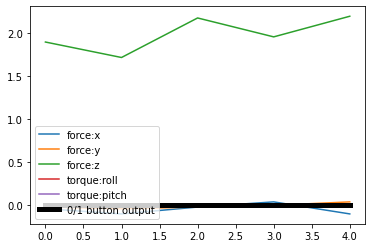

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.979965670651198 y -17.916070013481377 z 2.076937141936645
roll 179.298609953096 pitch 2.024038695573863 yaw -179.6066260851221
Forces and Torques:
[3.28, 0.3, 0.6599999999999999, -0.032397999999999996, 0.603796, 0]


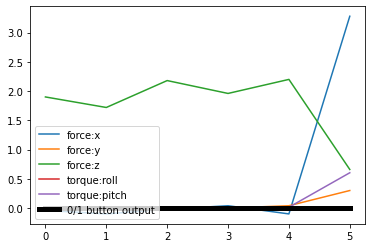

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.980138735412061 y -17.915382447719573 z 2.0269366792123766
roll 179.29601789144527 pitch 2.0239814028177388 yaw -179.6069802597474
Forces and Torques:
[3.3600000000000003, 0.4, 1.08, -0.058199999999999995, 0.624798, 0]


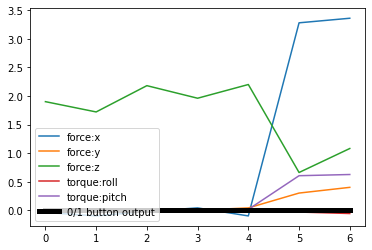

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.980275427240134 y -17.915333168262244 z 1.9758303619991988
roll 179.29573122004552 pitch 2.0241627457321587 yaw -179.60447108542036
Forces and Torques:
[3.4799999999999995, 0.28, 1.1199999999999999, -0.0216, 0.6637980000000001, 0]


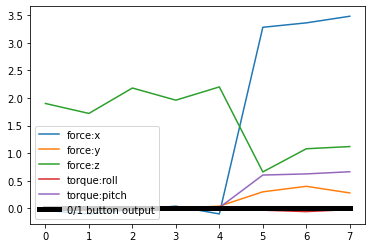

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.9795491419047115 y -17.913784385317566 z 1.9234508454732597
roll 179.28643227949914 pitch 2.0256574608688145 yaw -179.6037223782131
Forces and Torques:
[3.6800000000000006, 0.18, 1.9599999999999997, -0.012598000000000002, 0.6938, 0]


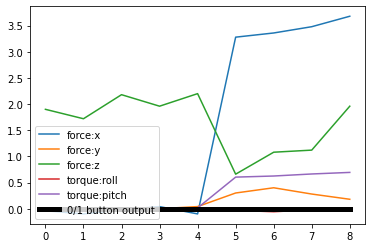

 l
 obs


BUTTON NOT PRESSED
currentpose: x -7.979595488061011 y -17.914098835188152 z 1.8732322918172926
roll 179.28563322197542 pitch 2.026680788956464 yaw -179.60059089029
Forces and Torques:
[3.5799999999999996, 0.45999999999999996, 0.38, -0.0402, 0.6758000000000001, 0]


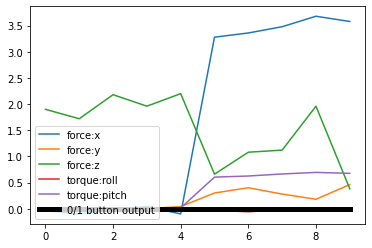

 l
 obs


BUTTON PRESSED! Episode over!
currentpose: x -7.979530955438316 y -17.917634049591424 z 1.853239791976288
roll 179.30893398937968 pitch 2.0256186500424676 yaw -179.59716240839202
Forces and Torques:
[2.7800000000000002, 0.36000000000000004, -2.7, -0.0472, 0.538, 0]


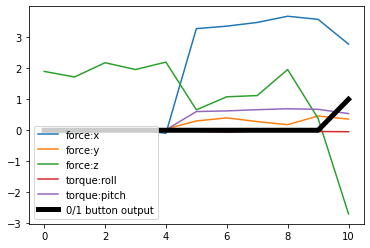

 reset


waiting for done response
b'done'


 end


end episode
closing DC socket in .py file
Error. closing SnS socket


In [2]:
import socket
import numpy as np
from time import sleep

HOST_SnS = '192.168.0.103'#'128.138.224.236' 
PORT_SnS= 65490
# Create a TCP/IP socket
sock_SnS = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect the socket to the port where the server is listening
server_address_SnS = (HOST_SnS, PORT_SnS)
print('connecting to {} port {}'.format(*server_address_SnS))
sock_SnS.connect(server_address_SnS)


try:
     #while True:
        """Restart
        data = sock.recv(16)
            #amount_received += len(data)
        print('received {!r}'.format(data))
        """

        data = sock_SnS.recv(64)  #48 bytes
        #print(data)
        #value = struct.unpack('f',data)
        #unpacked = struct.unpack('f', data)
        print('received {!r}'.format(data))
        if data==b'start':
            
            print("starting rl policy")
            %run -i '2WayComms_and_RC-V7_ftdisplay.py'
   
            endmsg='end'
            data1=endmsg.encode('ascii')    
            sock_SnS.sendall(data1)
        #if (inputstring==b'end'):
        #   break    
        """"""
finally:       
    print('Error. closing SnS socket')
    sock_SnS.close()


In [53]:
a=[0.2, -0.1, 0.1, 0.013, 0.001, -0.007]
b=[0.2, 0.0, 0.5, 0.033, 0.006, -0.008]
c=[0.1, 0.1, 1.3, 0.013, -0.002, -0.007]
d=[0.1, 0.1, 1.2, 0.017, -0.001, -0.008]
e=[0.0, 0.1, 0.4, 0.026, -0.001, -0.00899]

LL=[]
LL.append(a)
LL.append(b)
LL.append(c)
L2=[0]*6
print("LL len",len(LL))
for i in range(len(a)): 
    #print("i:",i)
    L2[i]=0
    for j in range(len(LL)):  
        L2[i]+=LL[j][i]    
    L2[i]=L2[i]/(len(LL))


LL len 3
[0.16666666666666666, 0.0, 0.6333333333333333, 0.019666666666666666, 0.0016666666666666668, -0.007333333333333333]
